# Covid 19 Prediction using Lung CT Scan (using CNN)

# Author : Tenzing J




## Importing required Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing required data


In [102]:
main_dir = "D:/Statistics/M.Sc Statistics/Internship/ShapeAI/Final Project/Data"

train_dir = os.path.join("D:/Statistics/M.Sc Statistics/Internship/ShapeAI/Final Project/Data/train")
test_dir  = os.path.join("D:/Statistics/M.Sc Statistics/Internship/ShapeAI/Final Project/Data/test")

train_covid_dir    = os.path.join("D:/Statistics/M.Sc Statistics/Internship/ShapeAI/Final Project/Data/train/CT_covid")
train_noncovid_dir = os.path.join("D:/Statistics/M.Sc Statistics/Internship/ShapeAI/Final Project/Data/train/CT_noncovid")

test_covid_dir    = os.path.join("D:/Statistics/M.Sc Statistics/Internship/ShapeAI/Final Project/Data/test/CT_covid")
test_noncovid_dir = os.path.join("D:/Statistics/M.Sc Statistics/Internship/ShapeAI/Final Project/Data/test/CT_noncovid")

In [22]:
# print file name

train_covid_names    = os.listdir(train_covid_dir)
train_noncovid_names = os.listdir(train_noncovid_dir)

test_covid_names    = os.listdir(test_covid_dir)
test_noncovid_names = os.listdir(test_noncovid_dir)

In [23]:
# Total images in train and test

print("Total images present in the training set: ", len(train_covid_names + train_noncovid_names))
print("Total images present in the testing set: ", len(test_covid_names + test_noncovid_names))

Total images present in the training set:  1811
Total images present in the testing set:  484


## Data Visualization


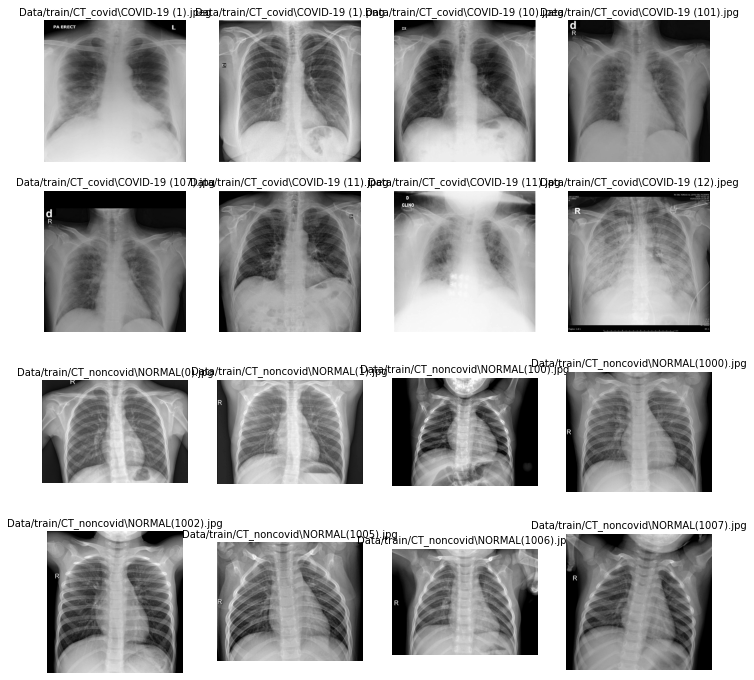

In [103]:
import matplotlib.image as mpimg

#figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the file names from the covid $ normal dir of the train dataset

covid_pic    = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
noncovid_pic = [os.path.join(train_noncovid_dir, filename) for filename in train_noncovid_names[0:8]]

#merge the covid and normal pics

mergerd_list = covid_pic + noncovid_pic
for i, img_path in enumerate(covid_pic + noncovid_pic):
    data = img_path.split('/',6)[6]
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data, fontsize = 10)
    plt.imshow(img, cmap='gray')
    
plt.show()

## Data Preprocessing and Augumentation

In [30]:
dgen_train = ImageDataGenerator(rescale = 1./255,
                               validation_split = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                subset = "training",
                                                batch_size = 32,
                                                class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                subset = "validation",
                                                batch_size = 32,
                                                class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [31]:
train_generator.class_indices

{'CT_covid': 0, 'CT_noncovid': 1}

In [32]:
train_generator.image_shape

(150, 150, 3)

## Building Convolutional Neural Network Model

In [37]:
model = Sequential()

#add the convolutional layer
# filters, size of filters, padding, activation function, input_shape
model.add(Conv2D(32,(5,5), padding = "SAME", activation = 'relu', input_shape = (150,150,3)))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.5))

#add another convolutional layer
model.add(Conv2D(64,(5,5),padding = "SAME",activation = "relu"))

#polling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#place a dropout layer
model.add(Dropout(0.5))

#Flattenlayer
model.add(Flatten())

#add a dense layer: amount of nodes activation
model.add(Dense(256, activation = "relu"))

#place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at eachupdate
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)            

# Compile and train the model

In [40]:
#compile the model

model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
#training the model

history = model.fit(train_generator,
                   epochs = 30,
                   validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 123s 3s/step - loss: 0.3375 - accuracy: 0.8682 - val_loss: 0.2375 - val_accuracy: 0.9448
Epoch 2/30
46/46 [==============================] - 106s 2s/step - loss: 0.2105 - accuracy: 0.9234 - val_loss: 0.2106 - val_accuracy: 0.9586
Epoch 3/30
46/46 [==============================] - 146s 3s/step - loss: 0.1411 - accuracy: 0.9469 - val_loss: 0.2473 - val_accuracy: 0.9365
Epoch 4/30
46/46 [==============================] - 142s 3s/step - loss: 0.1796 - accuracy: 0.9351 - val_loss: 0.2743 - val_accuracy: 0.9530
Epoch 5/30
46/46 [==============================] - 144s 3s/step - loss: 0.1618 - accuracy: 0.9455 - val_loss: 0.1338 - val_accuracy: 0.9724
Epoch 6/30
46/46 [==============================] - 136s 3s/step - loss: 0.1177 - accuracy: 0.9565 - val_loss: 0.1230 - val_accuracy: 0.9751
Epoch 7/30
46/46 [==============================] - 131s 3s/step - loss: 0.1564 - accuracy: 0.9524 - val_loss: 0.1517 - val_accuracy: 0.9669
Epoch 8/30
46

## Performance Evaluation

In [104]:
# get the keys of the history object

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epoch')

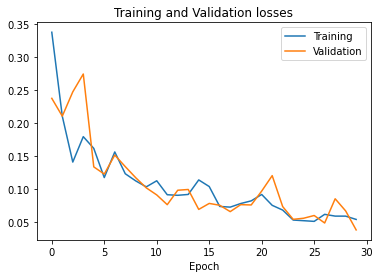

In [105]:
# Plot the graph betweeen the training and validation loss

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training","Validation"])
plt.title("Training and Validation losses")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

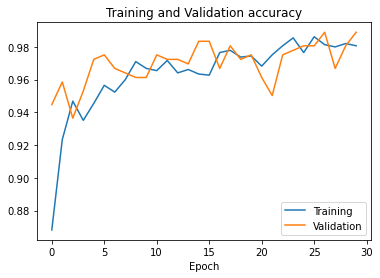

In [106]:
# Plot the graph betweeen the training and validation accuracy

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training","Validation"])
plt.title("Training and Validation accuracy")
plt.xlabel("Epoch")

In [110]:
# get the test accuracy and loss

test_loss, test_acc = model.evaluate(test_generator)

16/16 [==============================] - 14s 875ms/step - loss: 0.0647 - accuracy: 0.9814


In [111]:
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

Test loss:  0.06465120613574982
Test Accuracy:  0.9814049601554871


## Prediction on new data

D:/Statistics/M.Sc Statistics/Internship/ShapeAI/Final Project/Data/train/CT_covid/COVID-19 (4).jpg


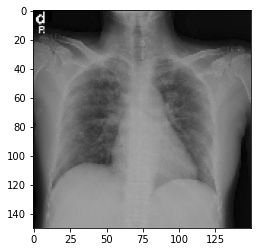

Covid is detected


In [118]:
from PIL import Image  
from tensorflow.keras.preprocessing import image

img_path = input()
plt.imshow(img)
plt.show()
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_batch)

if prediction ==0:
     print("Covid is detected")
else:
    print("Covid is not detected")